## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 




For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 



## Problem statement

Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

### Definitions of Churn
There are various ways to define churn, such as:

***Revenue-based churn***: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

***Usage-based churn***: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

The usage-based definition is considered to define churn.

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ***‘good’*** phase: In this phase, the customer is happy with the service and behaves as usual.

The ***‘action’*** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ***‘churn’*** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [0]:
# import lib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [0]:
# setting options for visual purposes
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [0]:
df= pd.read_csv('telecom_churn_data.csv')

In [8]:
# google collab
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML-2 Telecom churn assignment/data/telecom_churn_data.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [12]:
q=[.60,.70,.80,.90,.95,.99]
df.describe(percentiles=q)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

All the columns have outliers.
These can handled by Scaling the data

We also see the columns 'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g' have to be renamed

In [0]:
df.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                                'jul_vbc_3g': 'vbc_3g_7',
                                'aug_vbc_3g': 'vbc_3g_8',
                                'sep_vbc_3g': 'vbc_3g_9'
                               }, inplace=True)

In [14]:
categorical_data =df.select_dtypes(exclude = [np.number])
categorical_data.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

These categorical variables have to converted to appropriate date datatype

In [0]:
def convert_date(col):
  df[col]=pd.to_datetime(df[col])

In [0]:
for col in categorical_data.columns:
  convert_date(col)

## Data Cleaning

Filter all unique cols and no unique value cols in the dataset

In [0]:
df=df[df.columns[df.nunique() > 1]]

In [18]:
df.columns[df.nunique() == df.shape[0]]

Index(['mobile_number'], dtype='object')

In [0]:
df.drop('mobile_number', axis=1,inplace=True)

In [20]:
df.shape

(99999, 209)

In [21]:
# missing values analysis
missing_cols=round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)
missing_cols

total_rech_data_6           74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
fb_user_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
fb_user_9                   74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user

There is a significant data that is missing, also there is a pattern to the missing data which indicates that maybe that the data is correctly ordered and missing value indicates a genuine case to be missing.

Let's examine



In [22]:
df.sample(5)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
76568,129.436,232.524,0.000,0.000,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.0,0.0,NaN,0.00,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,5.24,0.00,2.78,NaN,0.00,0.00,0.00,NaN,5.24,0.00,2.78,NaN,0.0,0.00,0.00,NaN,0.00,5.10,15.78,NaN,0.00,0.23,0.00,NaN,0.00,5.33,15.78,0.00,5.24,5.63,18.84,NaN,0.00,0.30,0.28,NaN,0.00,0.00,0.00,NaN,0.00,0.0,0.0,3,3,2,1,152,274,0,0,152,274,0,0,2014-06-26,2014-07-24,2014-08-24,2014-09-28,152,274,0,0,2014-06-26,2014-07-24,NaT,NaT,2.0,1.0,NaN,NaN,152.0,274.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN,304.0,274.0,NaN,NaN,45.99,68.17,0.00,0.00,446.49,451.00,0.00,0.00,64.29,0.01,NaN,NaN,64.33,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,1.0,NaN,




*  The columns that have max_rech_data as null have all the related columns to data such as count_rech_2g, count_rech_3g, av_rech_amt_data etc as null which completly makes sense.
*   The columns that have last_day_rch_amt as 0 have all the date columns as null as it is the case 


*   The columns with total_rech_data as null have max_rech_data as null, that means the customer did not recharge for data.
*   If the customer does not recharge for that month for data or call all the corresponding columns are null.


*  Although the data seems to be having null values significantly it is meaningful data










In [0]:
df=df[~df.duplicated()]

Removing duplicate rows

## Filter Revenue data

In this project, you will use the usage-based definition to define churn and hence all the revenue values are of no use to us


In [24]:
rev_cols=[]
for col in df.columns:
  if('arpu' in col):
    rev_cols.append(col)

print(rev_cols)
df.drop(rev_cols,axis=1,inplace=True)

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']


## High Value customers extraction

We define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We consider 'total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7' to be the cols that represent the total amount spent in good phase

In [0]:
df1=df

In [0]:
df1['good_avg_rech']=round((df1['total_rech_amt_6']+df1['total_rech_amt_7'])/2)


good_avg_rech = avg of total_rech_amt_6 and total_rech_amt_7. 

In [0]:
x=df1['good_avg_rech'].quantile(.70)
high_value_cust=df1[df1.good_avg_rech > x ]

In [28]:
high_value_cust.shape

(29979, 198)

In [29]:
# convert dates to days 
data_cols=high_value_cust.select_dtypes(exclude=[np.number]).columns
print(data_cols)
for col in data_cols:
  high_value_cust[col]=high_value_cust[col].dt.day

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [0]:
# # fill null with 0
high_value_cust.fillna(0,inplace=True)

### Tagging churners

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [31]:
churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
high_value_cust[high_value_cust[churn_cols].sum(axis=1) == 0].shape

(2589, 198)

In [32]:
# percent of churn customers 
round(100*((high_value_cust[high_value_cust[churn_cols].sum(axis=1) == 0].shape[0])/high_value_cust.shape[0]))

9

There are about *9%* churn customers 


In [0]:
# lableing the churn customers 
churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

def classify_churn_cust(x):
  if(x.sum() == 0):
    return 1
  else:
    return 0

high_value_cust['churn']=high_value_cust[churn_cols].apply( lambda x: classify_churn_cust(x),axis=1) 


Removing all the 9th month columns

In [0]:
# remove all cols of month 9
for col in high_value_cust.columns:
  if('_9' in  col):
    high_value_cust.drop(col,axis=1,inplace=True)

In [35]:
high_value_cust.shape

(29979, 150)

## Data Visualization

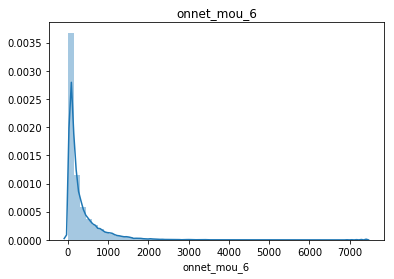

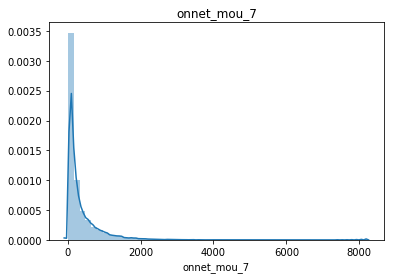

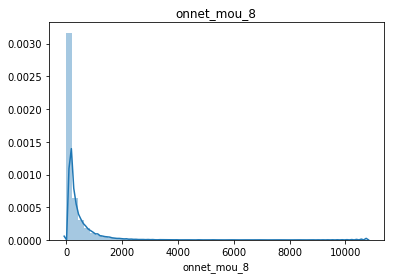

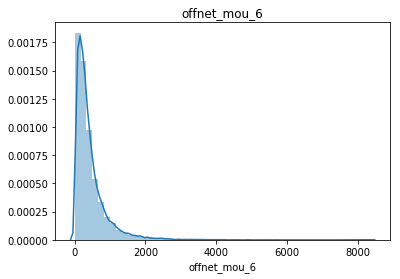

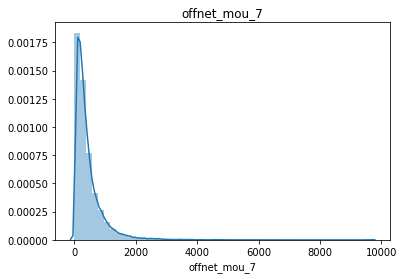

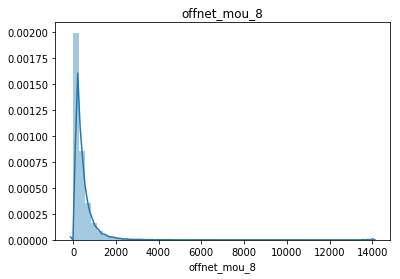

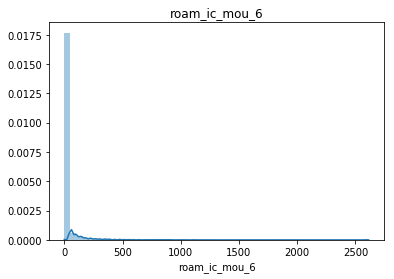

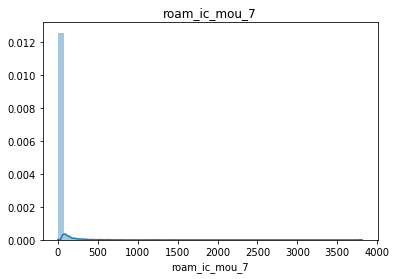

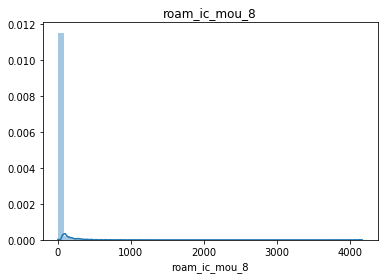

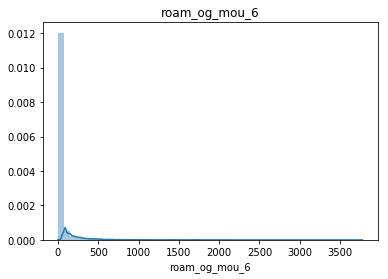

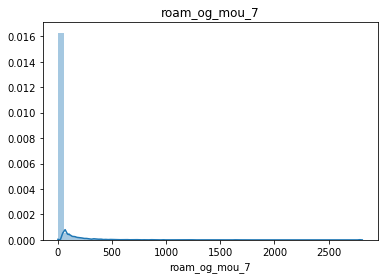

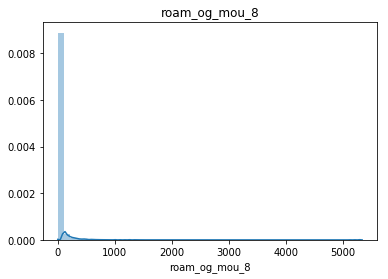

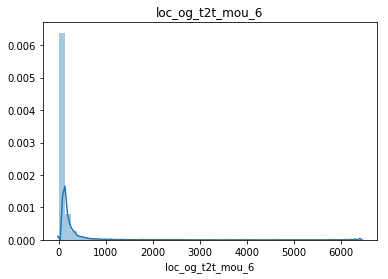

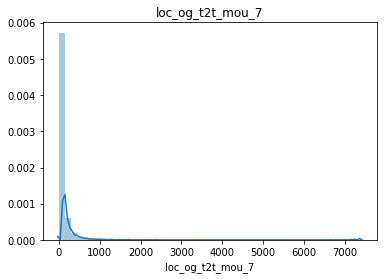

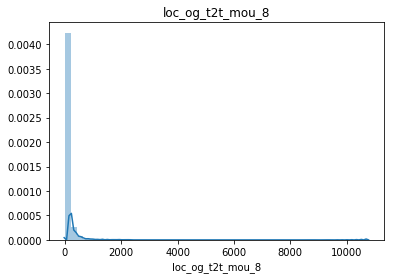

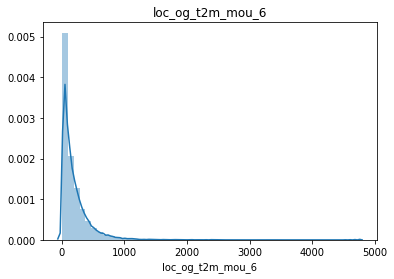

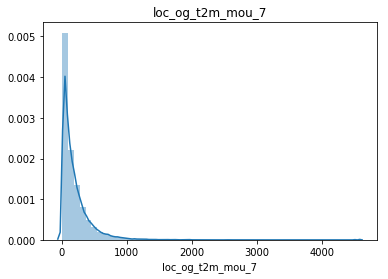

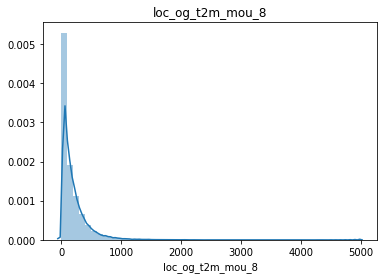

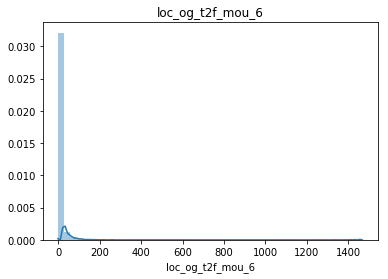

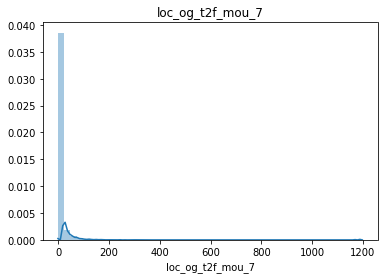

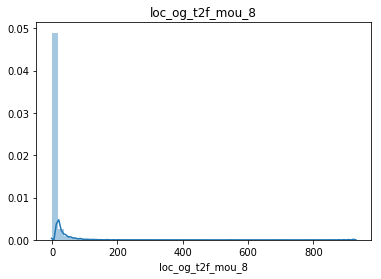

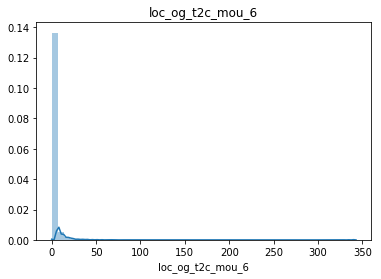

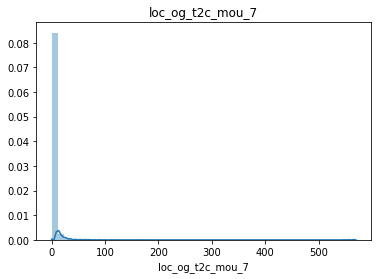

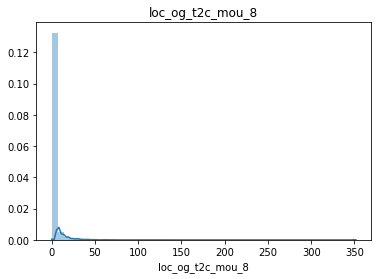

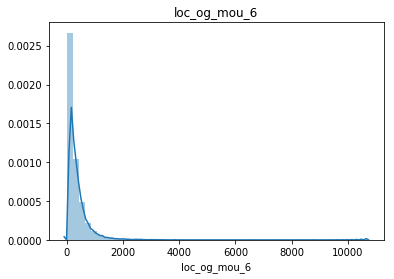

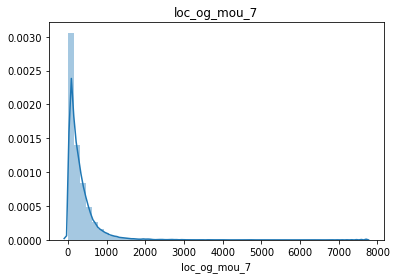

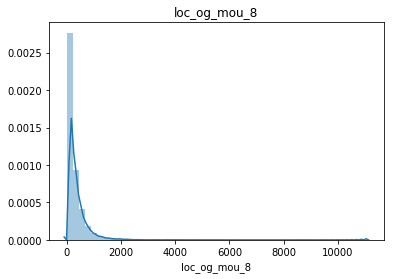

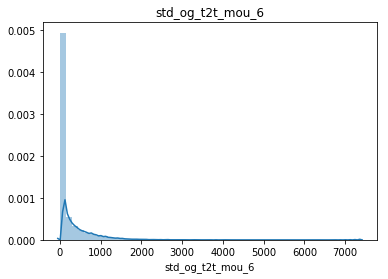

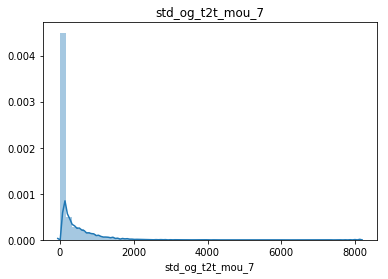

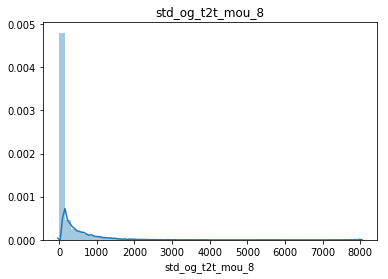

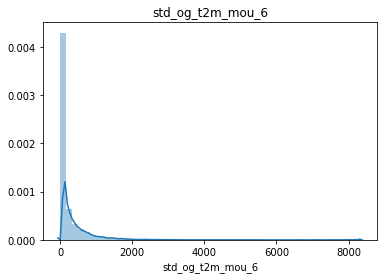

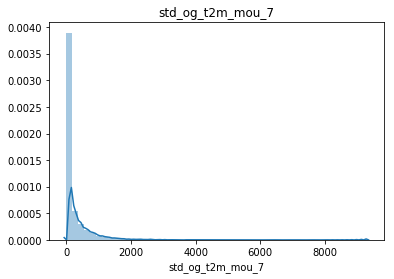

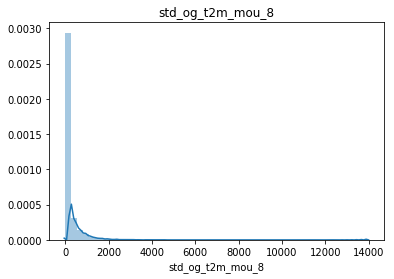

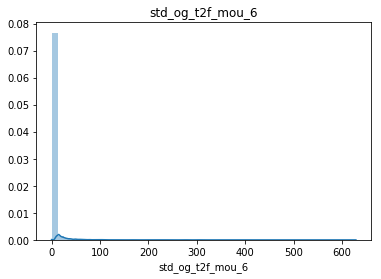

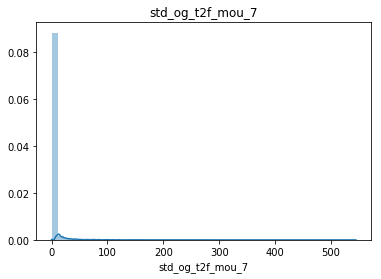

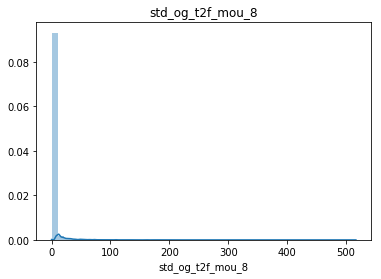

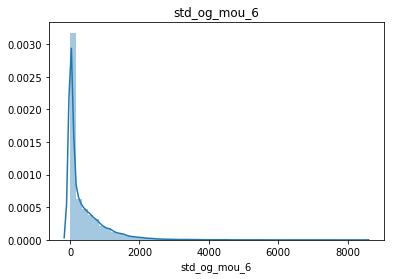

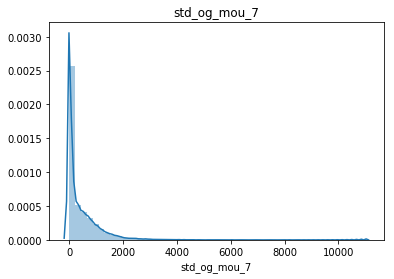

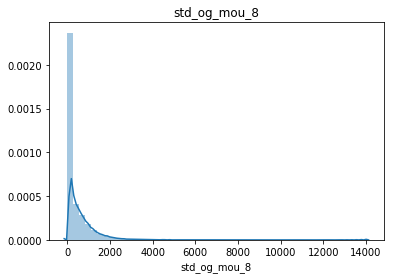

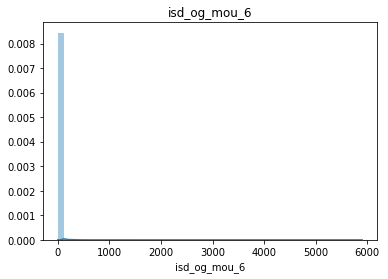

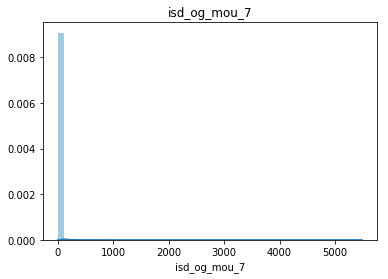

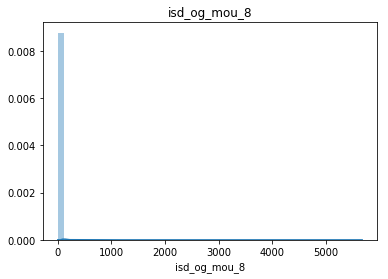

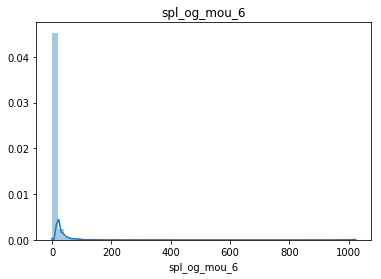

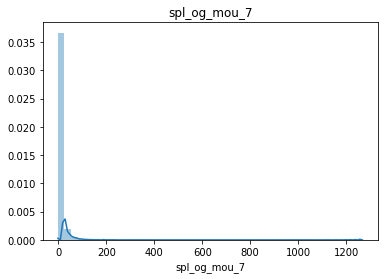

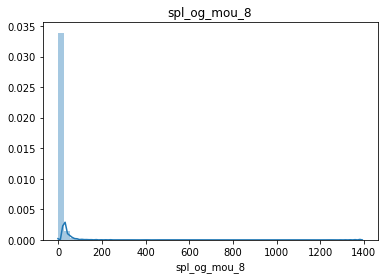

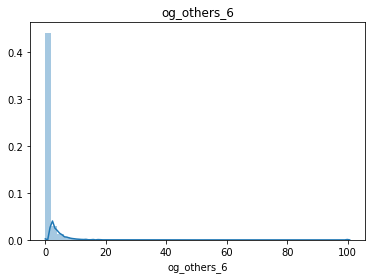

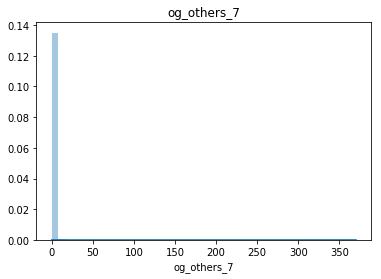

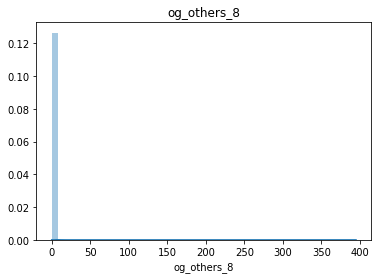

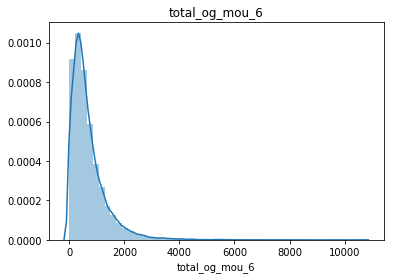

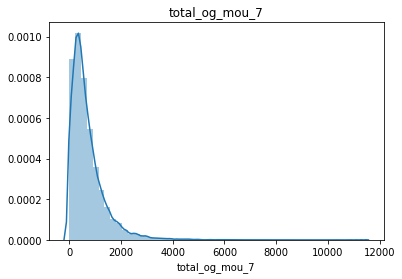

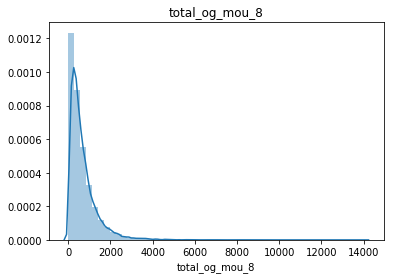

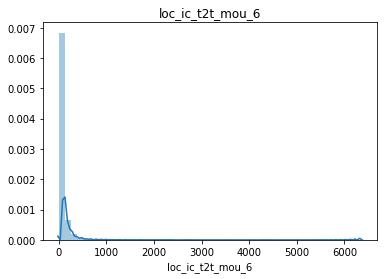

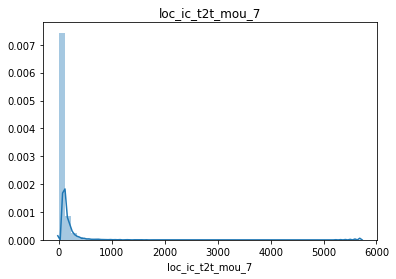

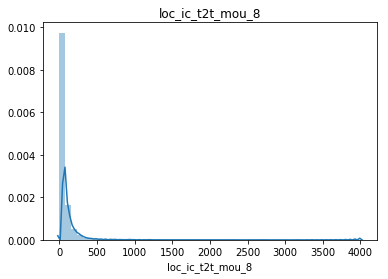

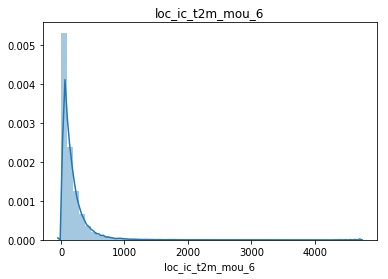

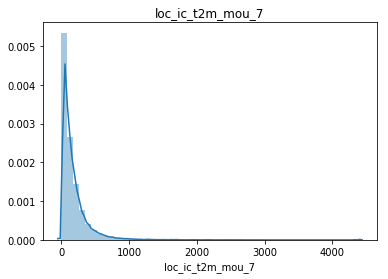

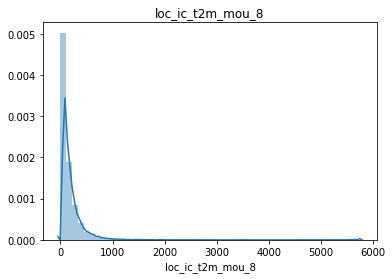

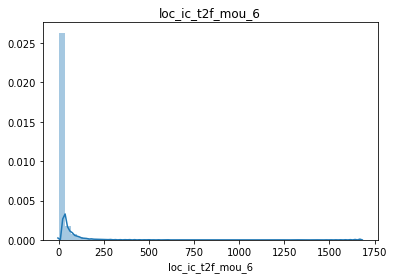

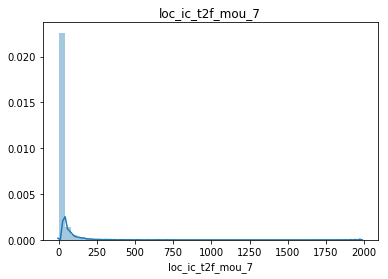

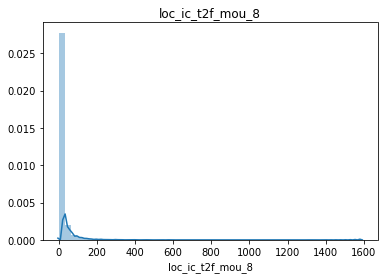

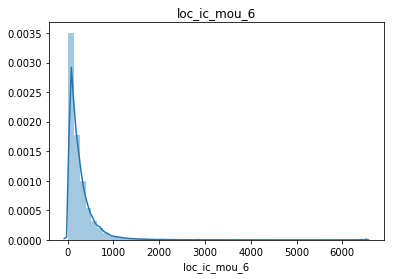

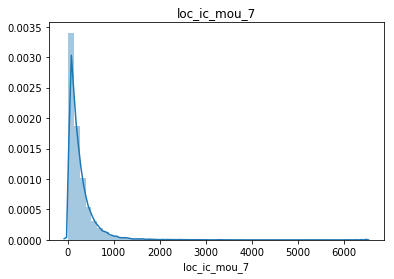

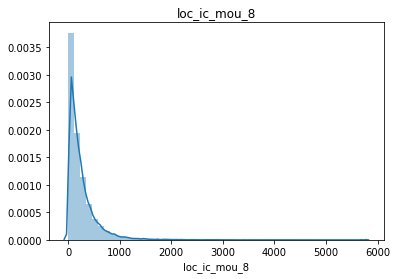

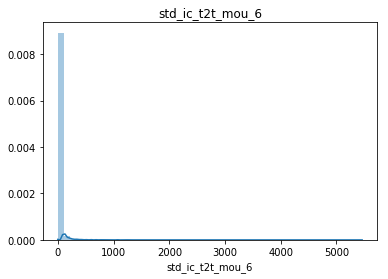

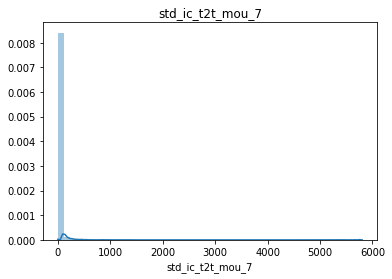

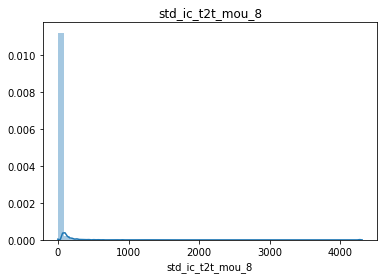

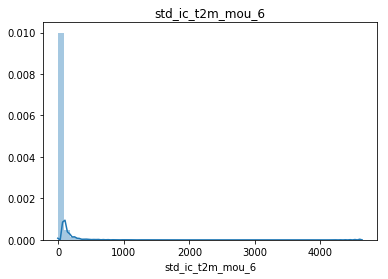

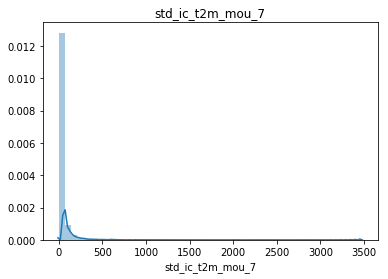

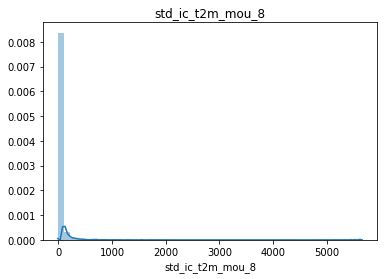

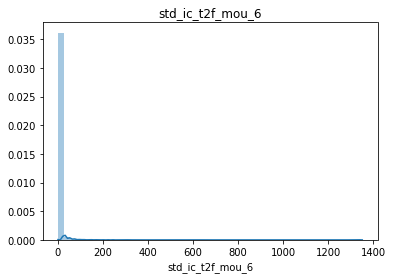

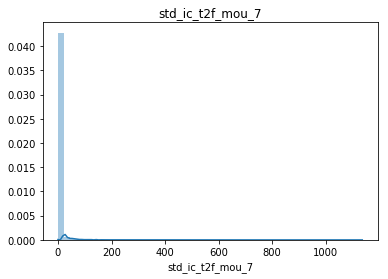

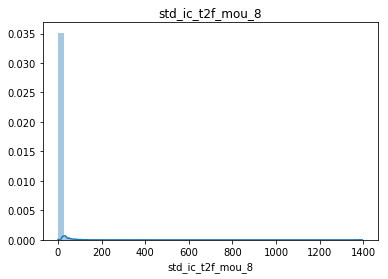

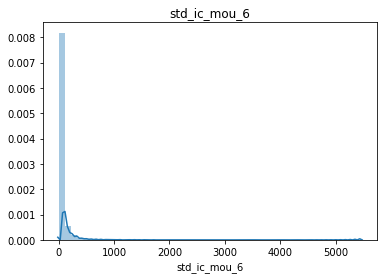

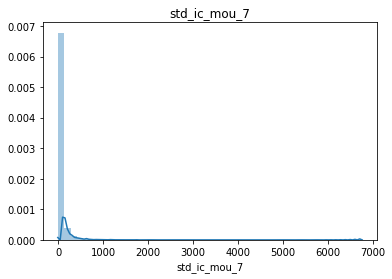

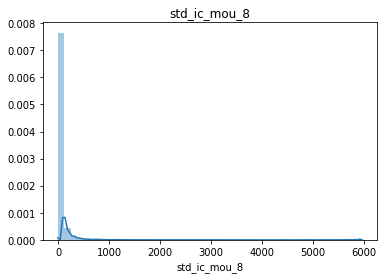

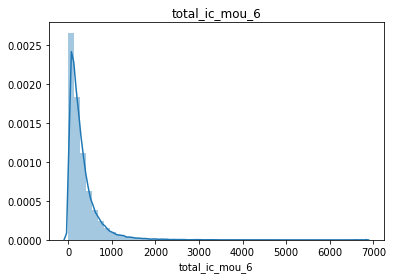

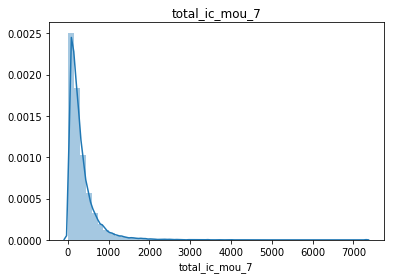

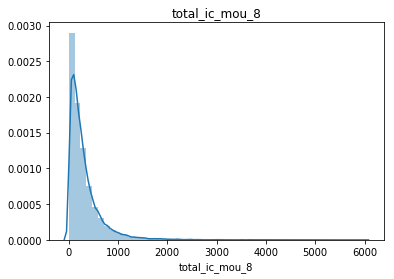

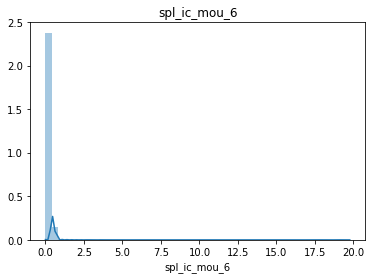

In [0]:
numerical_data =high_value_cust.select_dtypes(include = [np.number])
numerical_data.columns
numerical_data.drop(['churn'],axis=1,inplace=True)

for i, col in enumerate(numerical_data):
  plt.title(col)
  # sns.boxplot(y=high_value_cust[col])
  sns.distplot(high_value_cust[col])
  plt.show()
# # sns.pairplot(data=numerical_data)



*   onnet, offnet, roam_ic, roam_og are all skewed to the right
*   loc_og_t2t, loc_og_t2m, loc_og_t2f, loc_og_t2c,loc_og are all skewed to the right

*   Simillarly most of the features are right skewed
*   monthly_2g, monthly_3g has spikes at 0, 1, 2

*   fb_user has spikes only at 0 or 1 to indicate if using the services or not
*   aon is also skewed to the right but has a good distribution of data with peaks in the start which means most of the customers must be new to the network


---
*   All the categorical values are date type
*   All the plots are skewed to the left
*   The amount of recharge for data and calls seem to icrease as the month progresses









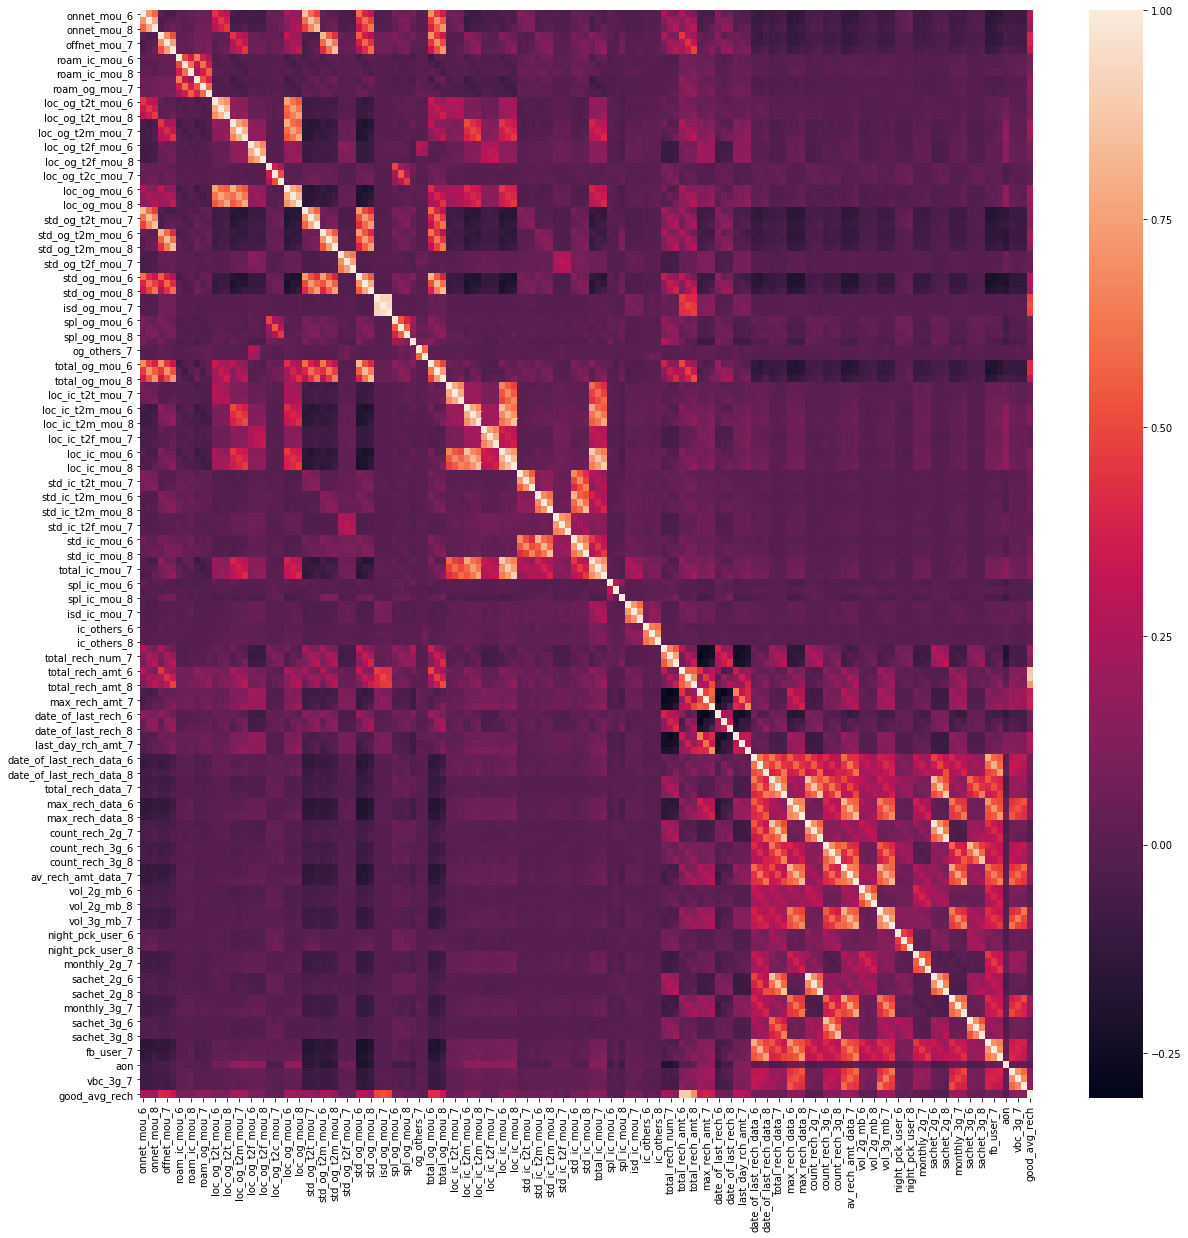

In [0]:
corr=numerical_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [0]:
churn_data=pd.DataFrame(high_value_cust.groupby('churn').mean())

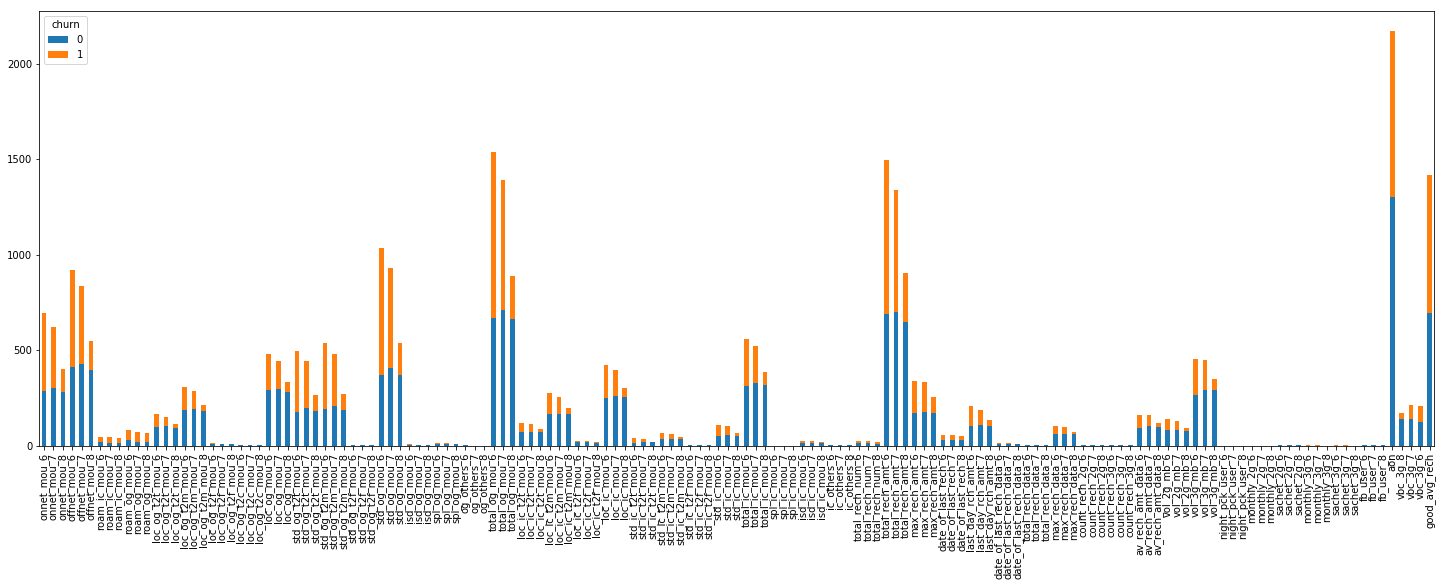

In [0]:
churn_data.T.plot(kind='bar',stacked=True,figsize=(25,8))
plt.show()

The aon, rech_amt, ic, og, offnet, onnet columns seem to be a good influence on the churn

## Feature Engineering

In [0]:
# avg_ic in good and diff in action phase

In [0]:
high_value_cust['good_avg_ic']=high_value_cust[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
high_value_cust['3mth_avg_ic_diff']=high_value_cust['good_avg_ic']-high_value_cust['total_ic_mou_8']
high_value_cust.drop(['total_ic_mou_6','total_ic_mou_7'],axis=1,inplace=True)

In [0]:
# avg_og in good and diff in action phase

In [0]:
high_value_cust['good_avg_og']=high_value_cust[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
high_value_cust['3mth_avg_og_diff']=high_value_cust['good_avg_og']-high_value_cust['total_og_mou_8']
high_value_cust.drop(['total_og_mou_6','total_og_mou_7'],axis=1,inplace=True)

In [0]:
# vol_2g_mb if more may be less network coverage

In [0]:
high_value_cust['good_vol_2g_mb']=high_value_cust[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
high_value_cust['3mth_vol_2g_mb_diff']=high_value_cust['good_vol_2g_mb']-high_value_cust['vol_2g_mb_8']
high_value_cust.drop(['vol_2g_mb_6','vol_2g_mb_7'],axis=1,inplace=True)

In [0]:
# vol_3g_mb in good and diff in action phase

In [0]:
high_value_cust['good_vol_3g_mb']=high_value_cust[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
high_value_cust['3mth_vol_3g_mb_diff']=high_value_cust['good_vol_3g_mb']-high_value_cust['vol_3g_mb_8']
high_value_cust.drop(['vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [0]:
# loc_og_t2c_mou in good and diff in action phase

In [0]:
high_value_cust['good_loc_og_t2c_mou']=high_value_cust[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
high_value_cust['3mth_loc_og_t2c_mou_diff']=high_value_cust['good_loc_og_t2c_mou']-high_value_cust['loc_og_t2c_mou_8']
high_value_cust.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7'],axis=1,inplace=True)

In [0]:
# aon in years

In [0]:
high_value_cust['aon_years']=round(high_value_cust['aon']/365,2)

In [0]:
# onnet  in good and diff in action phase

In [0]:
high_value_cust['good_onnet_mou']=high_value_cust[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
high_value_cust['3mth_onnet_mou_diff']=high_value_cust['good_onnet_mou']-high_value_cust['onnet_mou_8']
high_value_cust.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [0]:
# offnet in good and diff in action phase

In [0]:
high_value_cust['good_offnet_mou']=high_value_cust[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
high_value_cust['3mth_offnet_mou_diff']=high_value_cust['good_offnet_mou']-high_value_cust['offnet_mou_8']
high_value_cust.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

## Data prepration for model building

In [0]:
# Putting feature variable to X
X = high_value_cust.drop(['churn'],axis=1)

# Putting response variable to y
y = high_value_cust['churn']


In [0]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

RobustScaler is used as this scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [0]:
# standardizing train and test data
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.fit_transform(X_test)

## PCA

In [0]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

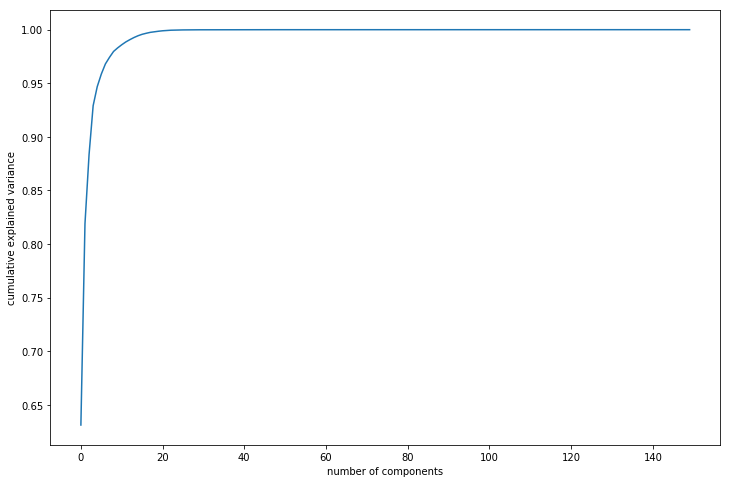

In [0]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the scree plot 10 components describe about 90% of the variance in the data

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [0]:
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(20985, 20)

In [0]:
# #Applying selected components to the test data - 90 components
test_pca = pca_final.transform(X_test)
test_pca.shape

(8994, 20)

Now that we have the priciple components in place let's build a Logistic regression model to classify the churn customers

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(train_pca.transpose())

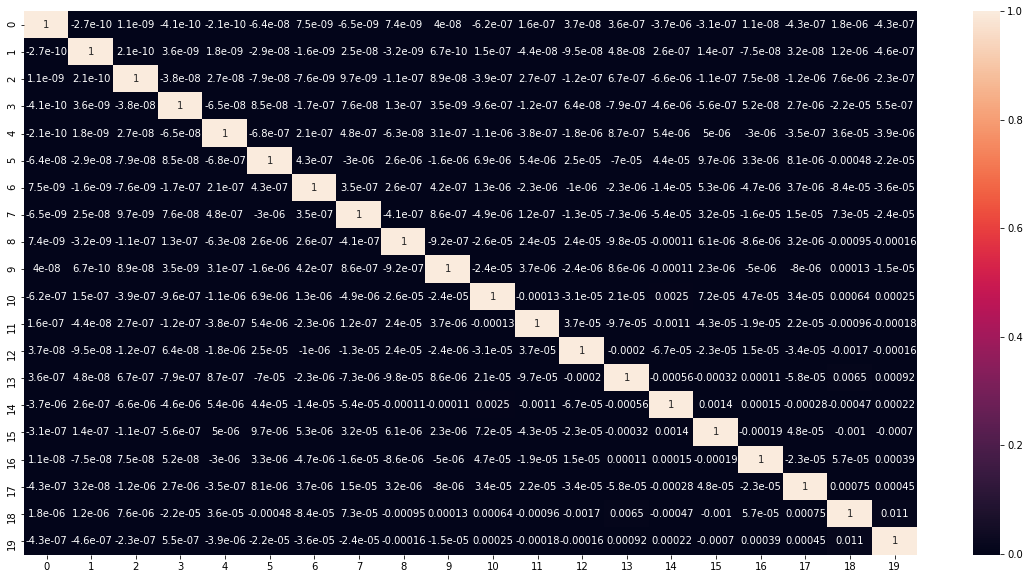

In [0]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [0]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.010696923823810083 , min corr:  -0.001684798792797971


Indeed - there is no correlation between any two components! Good job, PCA!

We effectively have removed multicollinearity from our situation, and our models will be much more stable

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
pca_log = LogisticRegression(class_weight='balanced')
pca_log_modal = pca_log.fit(train_pca,y_train)

In [0]:
#Making prediction on the test data
pred_probs_test = pca_log_modal.predict_proba(test_pca)[:,1]
"AUC - {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'AUC - 0.73'

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

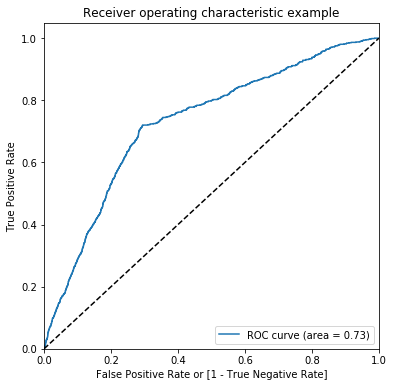

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99263455e+000, 9.92634549e-001, 9.88245856e-001, ...,
        2.31531828e-239, 4.60518688e-240, 0.00000000e+000]))

In [0]:
draw_roc(y_test,pred_probs_test)

In [0]:
# model_prediction = pd.Series(pca_log_modal.predict_proba(test_pca)[:,1]).map( lambda x: 1 if x > 0.5 else 0)

model_prediction=pca_log_modal.predict(test_pca)
model_prediction

array([1, 1, 0, ..., 1, 0, 0])

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test)

In [0]:
y_pred_df.head()

,churn
76438,0
72869,0
86053,0
29093,0
96385,0


In [0]:
y_pred_df.reset_index(drop=True,inplace=True)

In [0]:
# Appending the churn porb
y_pred_df = pd.concat([y_pred_df,pd.Series(pred_probs_test)],axis=1)

In [0]:
y_pred_df.head()

,churn,0
0,0,0.517662
1,0,0.520190
2,0,0.355106
3,0,0.426424
4,0,0.949728


In [0]:
# Appending predictions
y_pred_df = pd.concat([y_pred_df,pd.Series(model_prediction)],axis=1)
y_pred_df.columns=['churn','churn_prob','prediction']

In [0]:
y_pred_df.head()

,churn,churn_prob,prediction
0,0,0.517662,1
1,0,0.520190,1
2,0,0.355106,0
3,0,0.426424,0
4,0,0.949728,1


In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_df.head()

,churn,churn_prob,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.517662,1,1,1,1,1,1,1,0,0,0,0
1,0,0.520190,1,1,1,1,1,1,1,0,0,0,0
2,0,0.355106,0,1,1,1,1,0,0,0,0,0,0
3,0,0.426424,0,1,1,1,1,1,0,0,0,0,0
4,0,0.949728,1,1,1,1,1,1,1,1,1,1,1


In [0]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_df.churn, y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090727  0.000122  1.000000
0.1   0.1  0.326662  0.268737  0.907975
0.2   0.2  0.348455  0.294413  0.890798
0.3   0.3  0.378030  0.328524  0.874847
0.4   0.4  0.426951  0.384155  0.856442
0.5   0.5  0.544696  0.520235  0.790184
0.6   0.6  0.879253  0.950850  0.160736
0.7   0.7  0.899600  0.982027  0.072393
0.8   0.8  0.904270  0.991075  0.033129
0.9   0.9  0.906938  0.996332  0.009816


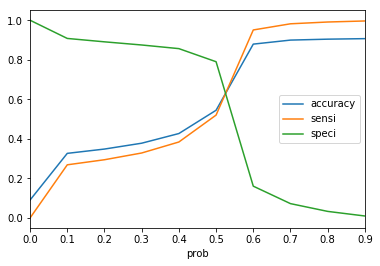

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

The accuracy, sensitivity and specificity curves intersect at an optimum prob of 0.6

In [0]:
y_pred_df['final_predicted'] = y_pred_df.churn_prob.map( lambda x: 1 if x > 0.6 else 0)

In [0]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,y_pred_df['final_predicted']))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8179
           1       0.25      0.16      0.19       815

    accuracy                           0.88      8994
   macro avg       0.58      0.56      0.56      8994
weighted avg       0.86      0.88      0.87      8994



In [0]:
cm = metrics.confusion_matrix( y_test,y_pred_df.final_predicted )
cm

array([[7777,  402],
       [ 684,  131]])

In [0]:
total1=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total1
sensi = cm[0,0]/(cm[0,0]+cm[0,1])
speci = cm[1,1]/(cm[1,0]+cm[1,1])

"Accuracy of {:2.2}, Sensitivity of {:2.2} and Specificity of {:2.2}".format(accuracy,sensi,speci)

'Accuracy of 0.88, Sensitivity of 0.95 and Specificity of 0.16'

This means the model can correctly predict a churn customer with 95% accuracy\
And over all of 88% accuracy with just 10 components




## Deriving important features

### Random Forest

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# Making predictions
predictions = rfc.predict(X_test)

In [0]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8179
           1       0.77      0.09      0.16       815

    accuracy                           0.91      8994
   macro avg       0.84      0.54      0.56      8994
weighted avg       0.90      0.91      0.88      8994



In [0]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_test, predictions)

0.9149432955303536

In [0]:
cm = metrics.confusion_matrix( y_test,predictions )
cm

array([[8157,   22],
       [ 743,   72]])

In [0]:
total1=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total1
sensi = cm[0,0]/(cm[0,0]+cm[0,1])
speci = cm[1,1]/(cm[1,0]+cm[1,1])

"Accuracy of {:2.2}, Sensitivity of {:2.2} and Specificity of {:2.2}".format(accuracy,sensi,speci)

'Accuracy of 0.91, Sensitivity of 1.0 and Specificity of 0.088'

It looks like the model id over fit since it has very high sensitivity and very low specificity

Lets tune the hyperparameters of the random forest

### Tuning max_depth
Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.244015,0.006860,0.006133,0.000238,2,{'max_depth': 2},0.935684,0.933286,0.938528,0.944008,0.941849,0.938670,0.003912,4,0.940073,0.940553,0.938289,0.938349,0.938650,0.939183,0.000943
1,0.633431,0.014581,0.007492,0.000083,7,{'max_depth': 7},0.938066,0.937336,0.943531,0.947582,0.945186,0.942340,0.004008,1,0.948591,0.947343,0.946212,0.947165,0.946513,0.947165,0.000825
2,0.933463,0.016086,0.008914,0.000073,12,{'max_depth': 12},0.932825,0.935668,0.941148,0.944961,0.941611,0.939242,0.004380,2,0.974981,0.976531,0.974625,0.975399,0.976294,0.975566,0.000737
3,1.129312,0.040301,0.009847,0.000153,17,{'max_depth': 17},0.935207,0.931380,0.941625,0.942578,0.942803,0.938718,0.004609,3,0.990945,0.990291,0.992256,0.990767,0.991899,0.991232,0.000732


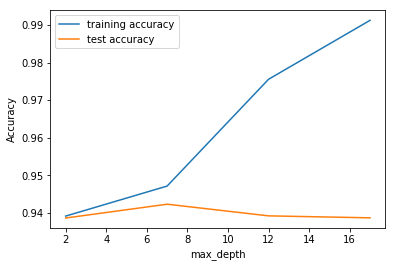

In [0]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators
Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [100,200,300,500]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs = -1,return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.351123,0.079881,0.051004,0.003320,100,{'n_estimators': 100},0.938780,0.936860,0.943769,0.949249,0.944233,0.942578,0.004377,1,0.943587,0.944603,0.942697,0.941387,0.942641,0.942983,0.001071
1,10.652153,0.135862,0.102317,0.001546,200,{'n_estimators': 200},0.938780,0.936145,0.943769,0.948535,0.944233,0.942292,0.004360,3,0.943885,0.944127,0.942221,0.941685,0.942343,0.942852,0.000971
2,15.854382,0.291572,0.150099,0.001507,300,{'n_estimators': 300},0.938542,0.935907,0.944008,0.948773,0.944233,0.942292,0.004551,3,0.943706,0.944365,0.942399,0.941387,0.942701,0.942912,0.001037
3,25.172260,2.559987,0.233004,0.036314,500,{'n_estimators': 500},0.939019,0.935907,0.943769,0.949011,0.944471,0.942435,0.004549,2,0.943885,0.944127,0.942578,0.941506,0.942701,0.942959,0.000953


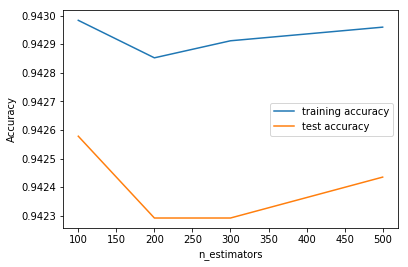

In [0]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features
Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [0]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.195956,0.007694,0.006911,0.000332,4,{'max_features': 4},0.933063,0.927806,0.933286,0.941387,0.942803,0.935668,0.005619,5,0.936379,0.936204,0.935847,0.937872,0.940318,0.937324,0.001649
1,0.302285,0.010233,0.006907,0.000237,8,{'max_features': 8},0.937351,0.936145,0.944008,0.948058,0.942326,0.941577,0.004378,4,0.943766,0.944603,0.942638,0.941387,0.942284,0.942935,0.001130
2,0.459915,0.006080,0.006834,0.000133,14,{'max_features': 14},0.940210,0.935907,0.943293,0.948773,0.944233,0.942483,0.004282,1,0.943647,0.944425,0.942697,0.941387,0.942343,0.942900,0.001051
3,0.624082,0.023054,0.006934,0.000250,20,{'max_features': 20},0.938780,0.935430,0.944722,0.948773,0.943994,0.942340,0.004695,2,0.943826,0.944067,0.942340,0.941089,0.942522,0.942769,0.001083
4,0.738788,0.021147,0.006824,0.000151,24,{'max_features': 24},0.938542,0.935907,0.942816,0.948058,0.944233,0.941911,0.004276,3,0.943289,0.944901,0.942459,0.941625,0.942165,0.942888,0.001142


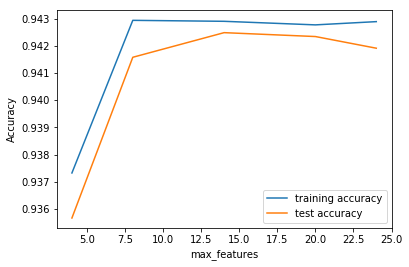

In [0]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
Let's now check the optimum value for min samples leaf in our case.

In [0]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.758871,0.021336,0.008485,0.000120,100,{'min_samples_leaf': 100},0.936636,0.936383,0.942816,0.947105,0.943279,0.941244,0.004143,1,0.942455,0.943174,0.940612,0.940195,0.941152,0.941518,0.001125
1,0.710947,0.013128,0.009052,0.000783,150,{'min_samples_leaf': 150},0.935445,0.934239,0.942102,0.947105,0.942326,0.940243,0.004774,2,0.940251,0.942340,0.939540,0.940195,0.939663,0.940398,0.001011
2,0.696301,0.020925,0.008586,0.000454,200,{'min_samples_leaf': 200},0.934731,0.937098,0.940910,0.948058,0.939704,0.940100,0.004516,3,0.941085,0.942935,0.939421,0.939302,0.938889,0.940326,0.001505
3,0.636144,0.027024,0.007945,0.000111,250,{'min_samples_leaf': 250},0.934969,0.934477,0.937574,0.944961,0.942088,0.938813,0.004090,6,0.940192,0.941744,0.938289,0.939540,0.939544,0.939862,0.001125
4,0.610656,0.025457,0.007827,0.000107,300,{'min_samples_leaf': 300},0.935684,0.934477,0.940672,0.946629,0.940896,0.939671,0.004331,4,0.940132,0.940791,0.939838,0.938825,0.940497,0.940017,0.000677


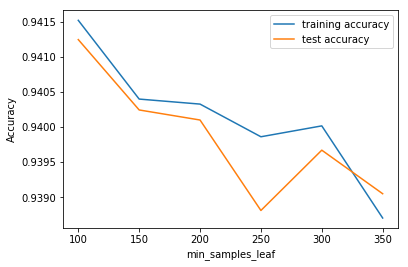

In [0]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split.

In [0]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.075827,0.047727,0.008967,0.000161,200,{'min_samples_split': 200},0.939019,0.936145,0.944484,0.947343,0.945663,0.942530,0.004240,1,0.943289,0.945080,0.943352,0.942102,0.943475,0.943460,0.000950
1,1.049518,0.031001,0.008725,0.000065,250,{'min_samples_split': 250},0.937113,0.934954,0.942102,0.946629,0.944948,0.941148,0.004473,6,0.943349,0.944127,0.941744,0.941089,0.942820,0.942626,0.001091
2,1.062921,0.040470,0.008977,0.000191,300,{'min_samples_split': 300},0.937589,0.935430,0.943293,0.947343,0.944948,0.941720,0.004498,3,0.943647,0.944425,0.942459,0.940255,0.941688,0.942495,0.001464
3,1.035348,0.044959,0.009148,0.000420,350,{'min_samples_split': 350},0.937113,0.936145,0.943293,0.948535,0.944233,0.941863,0.004635,2,0.941919,0.943650,0.942221,0.941565,0.942403,0.942352,0.000709
4,1.025069,0.039410,0.008589,0.000210,400,{'min_samples_split': 400},0.934254,0.936621,0.943293,0.947343,0.944709,0.941244,0.004973,4,0.941205,0.944484,0.942459,0.940672,0.941926,0.942149,0.001317


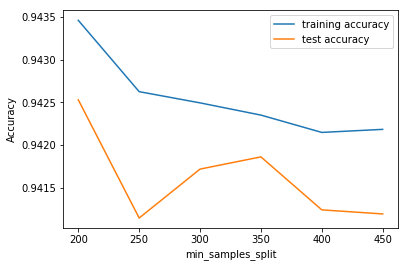

In [0]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9417679294734334 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                             class_weight='balanced')

In [0]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# predict
predictions = rfc.predict(X_test)

In [0]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8179
           1       0.50      0.73      0.59       815

    accuracy                           0.91      8994
   macro avg       0.73      0.83      0.77      8994
weighted avg       0.93      0.91      0.92      8994



In [0]:
cm=confusion_matrix(y_test,predictions)
cm

array([[7576,  603],
       [ 219,  596]])

In [0]:
total1=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total1
sensi = cm[0,0]/(cm[0,0]+cm[0,1])
speci = cm[1,1]/(cm[1,0]+cm[1,1])

"Accuracy of {:2.2}, Sensitivity of {:2.2} and Specificity of {:2.2}".format(accuracy,sensi,speci)

'Accuracy of 0.91, Sensitivity of 0.93 and Specificity of 0.73'

In [0]:
# rfc.feature_importances_

In [0]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [0]:
feature_importances.head(15)

,importance
total_ic_mou_8,0.111931
loc_ic_mou_8,0.090882
total_rech_amt_8,0.064600
total_og_mou_8,0.060344
loc_ic_t2t_mou_8,0.053823
loc_og_t2t_mou_8,0.053821
last_day_rch_amt_8,0.050571
loc_ic_t2m_mou_8,0.048198
3mth_avg_og_diff,0.043314
offnet_mou_8,0.041947


These are the important features that are to be considered.

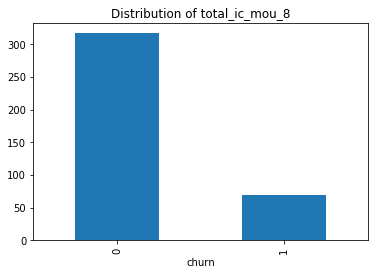

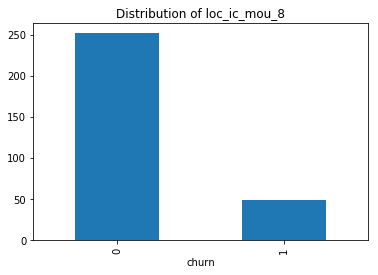

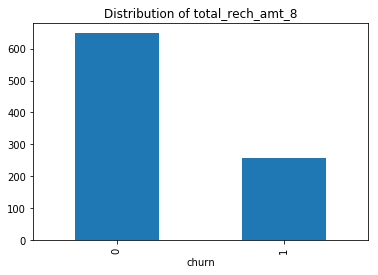

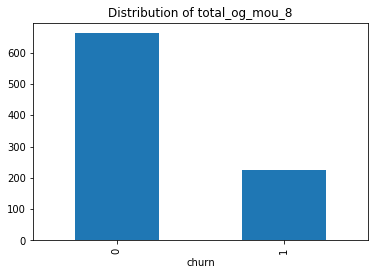

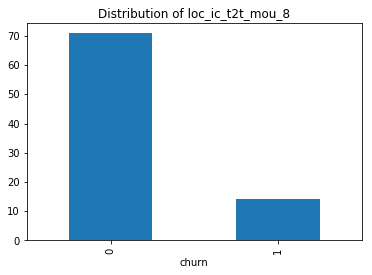

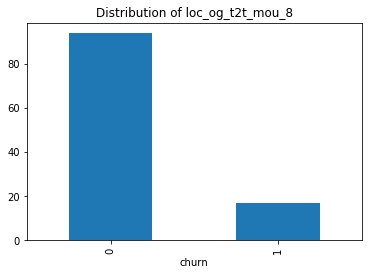

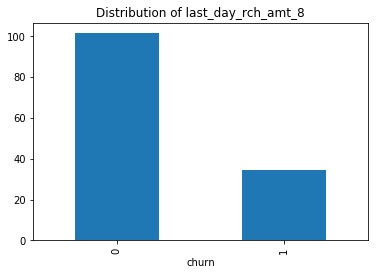

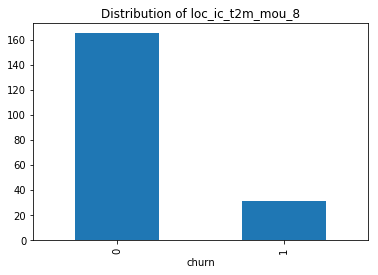

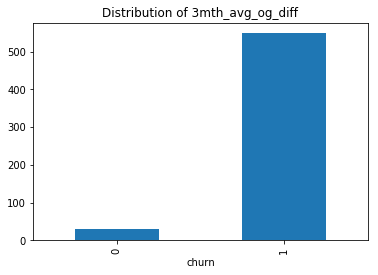

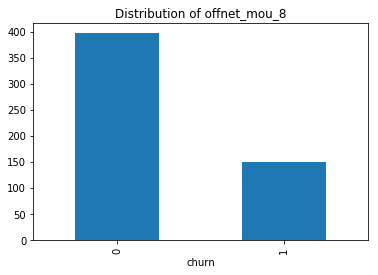

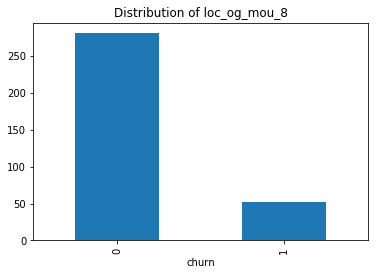

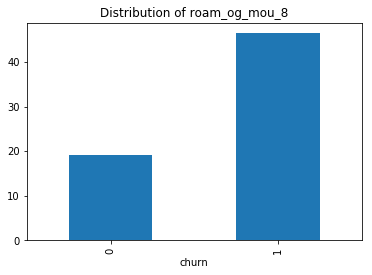

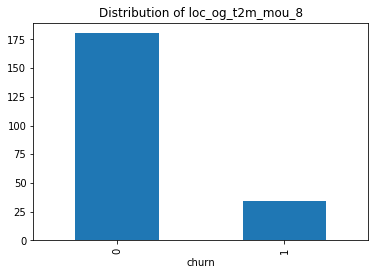

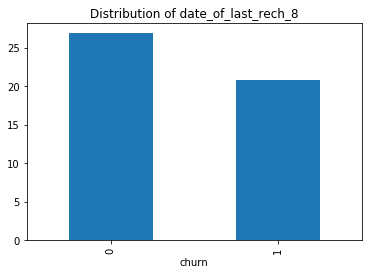

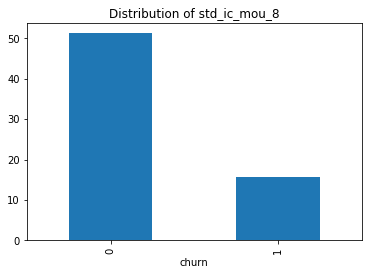

In [0]:
# visualize the features
for col in feature_importances.index[:15]:
  high_value_cust.groupby('churn').mean()[col].plot(kind='bar')
  plt.title('Distribution of '+col)
  plt.show()

## Recomended Stratagies



*   Closely monitor the customers behaviour in the action month 
*   Give discounts or offers to the customers who have a low outgoing calls
*   Provide better offers for  roaming customers   



